In [1]:
import tensorflow as tf
tf.enable_eager_execution()
import cv2
import xml.etree.ElementTree as ET
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('/extHDD1/workspace/TensorFlow/models/research')

In [3]:
from object_detection.core import preprocessor
from object_detection.utils import visualization_utils as vis_util

/extHDD1/workspace/TensorFlow/models/research/object_detection/utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/thaopn/.local/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/thaopn/.local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/thaopn/.local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
 

In [4]:
image_path = '/extHDD2/dataset_tool/visualize_image_augmentation/1_Handshaking_Handshaking_1_35.jpg'
xml_path = '/extHDD2/dataset_tool/visualize_image_augmentation/1_Handshaking_Handshaking_1_35.xml'

In [5]:
def load_xml(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    objects = []
    boxes = []
    size = None
    
    for element in root:
        if element.tag == 'size':
            width = int(element.find('width').text)
            height = int(element.find('height').text)
            size = (width, height)
        if element.tag == 'object':
            n_ele = element.find('name').text
            if n_ele == None: 
                continue
            
            bndbox = element.find('bndbox')
            xmin = int(bndbox.find('xmin').text) / width
            ymin = int(bndbox.find('ymin').text) / height
            xmax = int(bndbox.find('xmax').text) / width
            ymax = int(bndbox.find('ymax').text) / height
            
            objects.append(n_ele)
            boxes.append([ymin, xmin, ymax, xmax])

    return size, objects, boxes

### Load original image and boxes

In [6]:
image_ori = cv2.imread(image_path)
_, _, boxes = load_xml(xml_path)
boxes = np.array(boxes, dtype='float32')


In [7]:
image_vis = image_ori.copy()
vis_util.draw_bounding_box_on_image_array(
                    image=image_vis,  
                    xmin=boxes[0][1],
                    ymin=boxes[0][0], 
                    xmax=boxes[0][3], 
                    ymax=boxes[0][2], 
                    display_str_list=['face'], 
                    thickness=2, 
                    color='green',
                    use_normalized_coordinates=True
                )

In [15]:
result = preprocessor.random_rotation90(tf.convert_to_tensor(image_ori), boxes)
                                        
image_new, boxes_new = result

In [16]:

image_new = np.array(image_new)
vis_util.draw_bounding_box_on_image_array(
                    image=image_new,  
                    xmin=boxes_new[0][1],
                    ymin=boxes_new[0][0], 
                    xmax=boxes_new[0][3], 
                    ymax=boxes_new[0][2],
                    display_str_list=['face'], 
                    thickness=2, 
                    color='green',
                    use_normalized_coordinates=True
                )


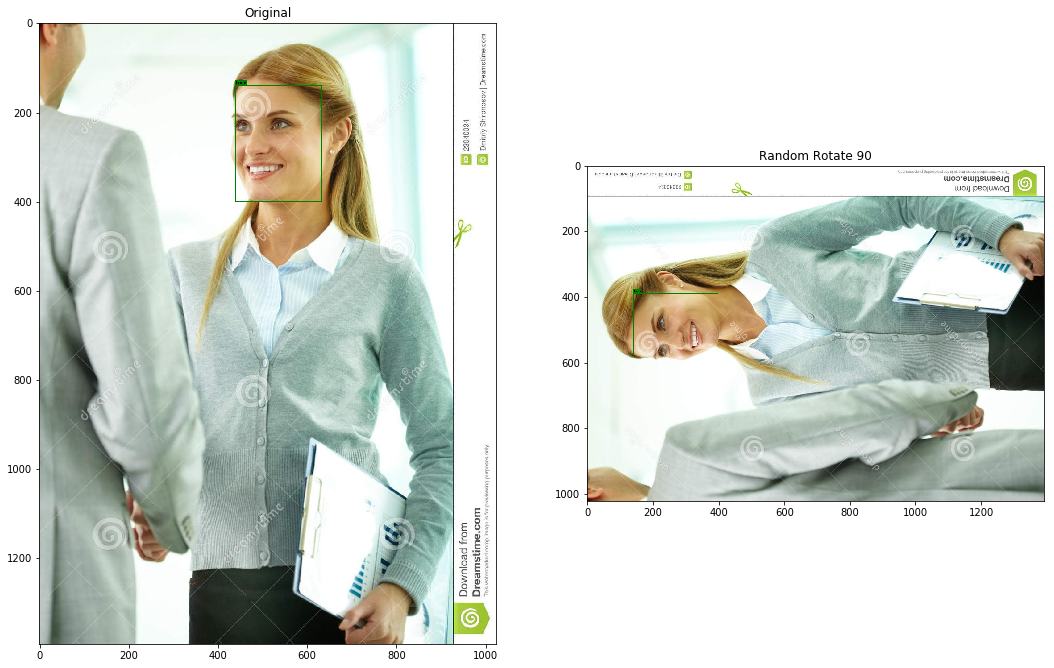

In [17]:
fig=plt.figure(figsize=(18,12))
fig.add_subplot(1, 2, 1).title.set_text('Original')
plt.imshow(image_vis[:,:,::-1])
fig.add_subplot(1, 2, 2).title.set_text('Random Rotate 90')
plt.imshow(image_new[:,:,::-1])
plt.show()